In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import math 

### Data Preprocessing

In [127]:
# Load dataset
df = pd.read_csv("../dataset/penguins.csv")

# Display first few rows
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [128]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values
df = df.dropna().reset_index(drop=True)

# Display first few rows
df.head()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [129]:
selected_features = ["culmen_length_mm", "culmen_depth_mm"]
df_selected = df[selected_features]

df_selected.head()

,culmen_length_mm,culmen_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
3,36.7,19.3
4,39.3,20.6


In [130]:
df_sample = df_selected.sample(n=100, random_state=42).reset_index(drop=True)

# Display the sample dataset
df_sample.head()

,culmen_length_mm,culmen_depth_mm
0,40.5,18.9
1,39.6,20.7
2,42.9,17.6
3,49.8,17.3
4,37.6,17.0


## Kmeans Clustering Algorithm Implementation
### Visualizing selecting k points as centroids

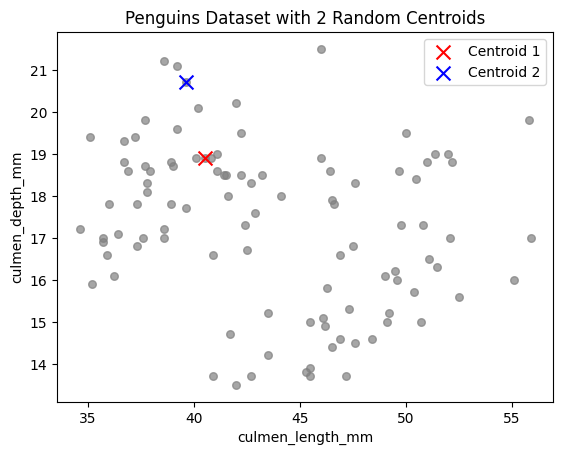

In [131]:
# Choosing 3 random rows as centroids
k = 2

# Select k random centroids
rand_centroids = df.sample(n=k, random_state=42)

# Selects k random rows as centroids from a DataFrame and plots them along with the full dataset.
def plot_random_centroids(df, centroids, k):

    # Scatter plot of the dataset
    df.plot.scatter(x="culmen_length_mm", y="culmen_depth_mm", s=30, c="gray", alpha=0.7)
    
    # Plot centroids
    colors = ["red", "blue", "yellow", "green", "purple", "orange", "cyan", "magenta"]
    
    for i in range(k):
        plt.scatter(centroids.iloc[i].culmen_length_mm, centroids.iloc[i].culmen_depth_mm, 
                    c=colors[i % len(colors)], marker="x", s=100, label=f'Centroid {i+1}')
    
    plt.title(f"Penguins Dataset with {k} Random Centroids")
    plt.legend()
    plt.show()

# Displays the random centroids on the plotted dataset
plot_random_centroids(df_sample, rand_centroids, k)

### Creating and plotting k number of clusters

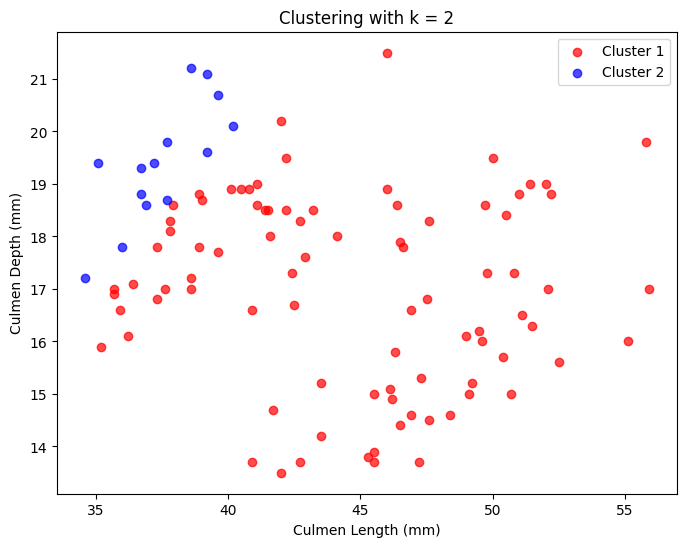

In [132]:
# Performs the Kmeans Clustering Algorithm 
def kmeans_clustering(df, centroids, num_clusters):
    # Initialize empty lists for each cluster
    clusters = {i: [] for i in range(num_clusters)}

    # Assign each point to the nearest centroid
    for i in range(len(df)):
        point = [df.iloc[i].culmen_length_mm, df.iloc[i].culmen_depth_mm]

        # Compute distances from all centroids
        distances = [
            math.dist(point, [centroids.iloc[j].culmen_length_mm, centroids.iloc[j].culmen_depth_mm]) 
            for j in range(num_clusters)
        ]

        # Find the index of the closest centroid
        closest_centroid = distances.index(min(distances))

        # Assign the point to the closest cluster
        clusters[closest_centroid].append(df.iloc[i].tolist())

    # Convert cluster lists into DataFrames
    cluster_dfs = {i: pd.DataFrame(clusters[i], columns=df.columns) for i in range(num_clusters)}

    return cluster_dfs

# Plots a dictionary of DataFrames as a scatter plot.
def plot_clusters(cluster_dfs):

    plt.figure(figsize=(8, 6))
    
    # Define a color map for clusters
    colors = ["red", "blue", "yellow", "green", "purple", "orange", "cyan", "magenta"]
    
    for i, (cluster_id, df) in enumerate(cluster_dfs.items()):
        plt.scatter(df["culmen_length_mm"], df["culmen_depth_mm"], 
                    label=f'Cluster {cluster_id+1}', color=colors[i % len(colors)], alpha=0.7)

    plt.xlabel("Culmen Length (mm)")
    plt.ylabel("Culmen Depth (mm)")
    plt.title(f"Clustering with k = {k}")
    plt.legend()
    plt.show()

# Plots the clusters created by the algorithm based on the random centroids and the number of clusters
plot_clusters(kmeans_clustering(df_sample, rand_centroids,k))

### Computing for a new centroid for each cluster until convergence

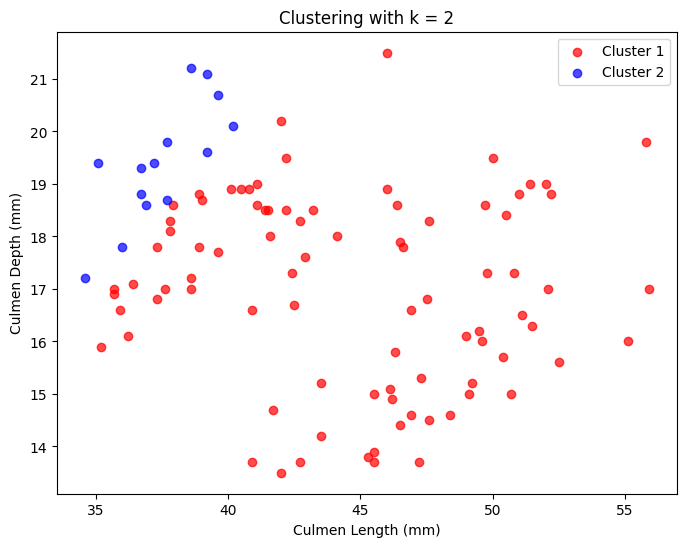

WCSS Value:  4547.4


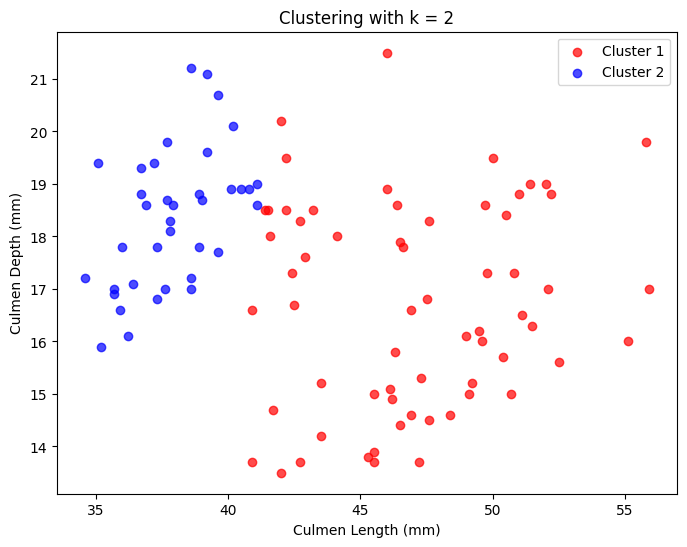

WCSS Value:  1771.4557032483083


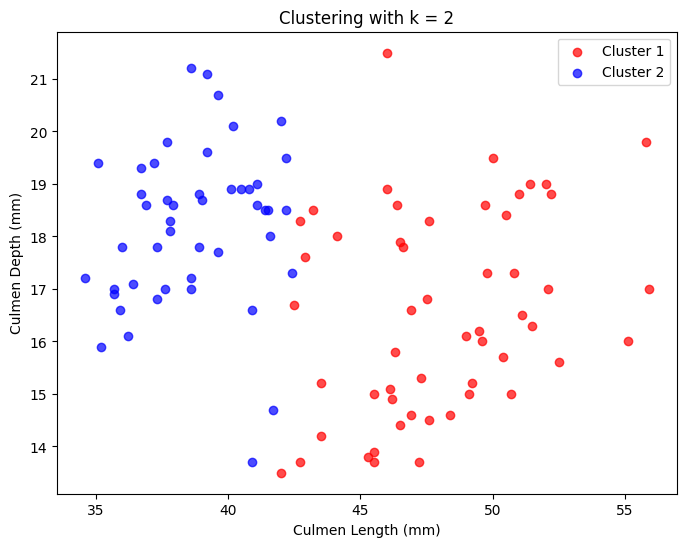

WCSS Value:  1227.0402014774468


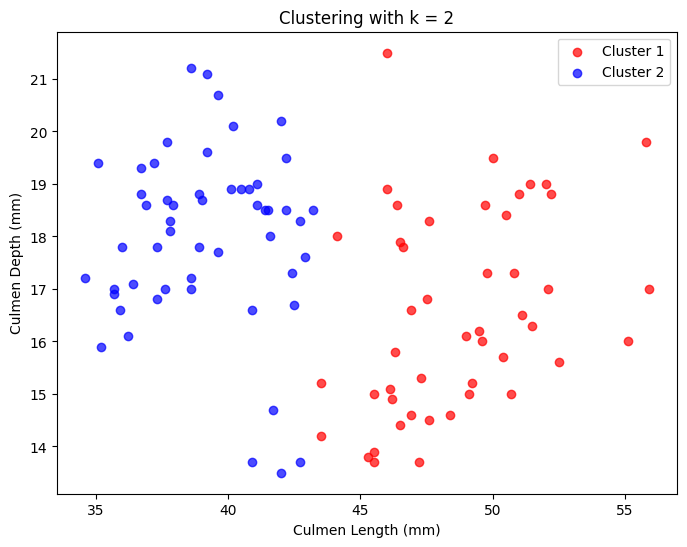

WCSS Value:  1083.1487323856043


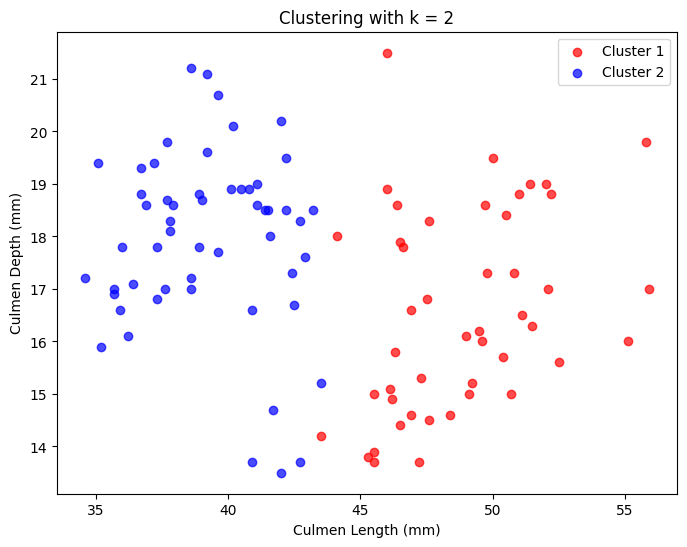

WCSS Value:  1046.5147821180738


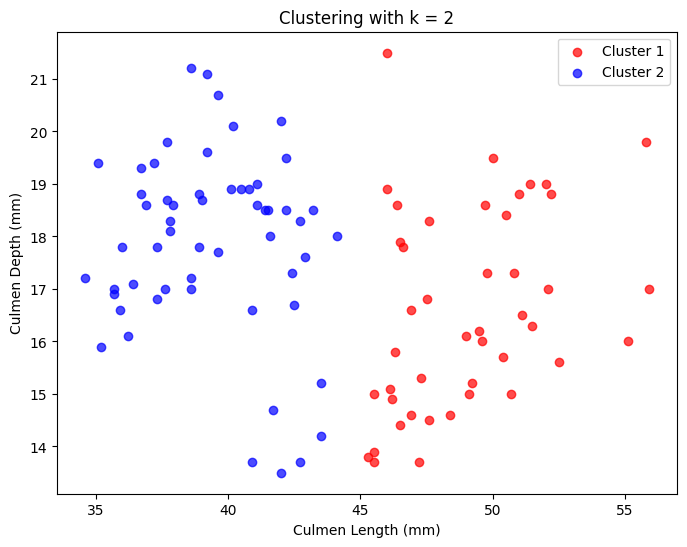

WCSS Value:  1043.2473151195024


In [133]:
# Calculates centroids for each cluster in a dictionary of DataFrames.
def calculate_centroids(cluster_dfs):
    # List that will contain the new centroids
    centroids = []

    for cluster_id, df in cluster_dfs.items():
        if not df.empty:
            # Calculate centroid (mean of first and second columns)
            centroid_x = df.iloc[:, 0].mean()  # Average of first column
            centroid_y = df.iloc[:, 1].mean()  # Average of second column
            centroids.append([centroid_x, centroid_y])

    # Create and return a DataFrame of centroids
    return pd.DataFrame(centroids, columns=['culmen_length_mm', 'culmen_depth_mm'])

def calculate_wcss(df, centroids, num_clusters):
    # Initialize empty lists for each cluster
    clusters = {i: [] for i in range(num_clusters)}
    wcss = 0

    # Assign each point to the nearest centroid
    for i in range(len(df)):
        point = [df.iloc[i].culmen_length_mm, df.iloc[i].culmen_depth_mm]

        # Compute distances from all centroids
        distances = [
            math.dist(point, [centroids.iloc[j].culmen_length_mm, centroids.iloc[j].culmen_depth_mm]) 
            for j in range(num_clusters)
        ]

        # Find the index of the closest centroid
        closest_centroid = distances.index(min(distances))

        # Assign the point to the closest cluster and square the value
        clusters[closest_centroid].append(min(distances)**2)

    # Add all the distances within each cluster
    for k in range(len(clusters)):
        wcss += sum(clusters[k])
    
    return wcss

# Assigns initial centroids as new centroids for iteration further down the code
new_centroids = rand_centroids

# Loops the calculation of new centroids and clustering based on the new centroids
# Stops until the next calculated centroid is the same with the current one
# meaning the clusters will be the same therefore the clustering has converged
while True:
    if new_centroids.equals(calculate_centroids(kmeans_clustering(df_sample, new_centroids, k))):
        break
    else:
        plot_clusters(kmeans_clustering(df_sample, new_centroids ,k))
        print("WCSS Value: ", calculate_wcss(df_sample, new_centroids, k))
        new_centroids = calculate_centroids(kmeans_clustering(df_sample, new_centroids, k))


### Elbow plot as a guide in choosing k

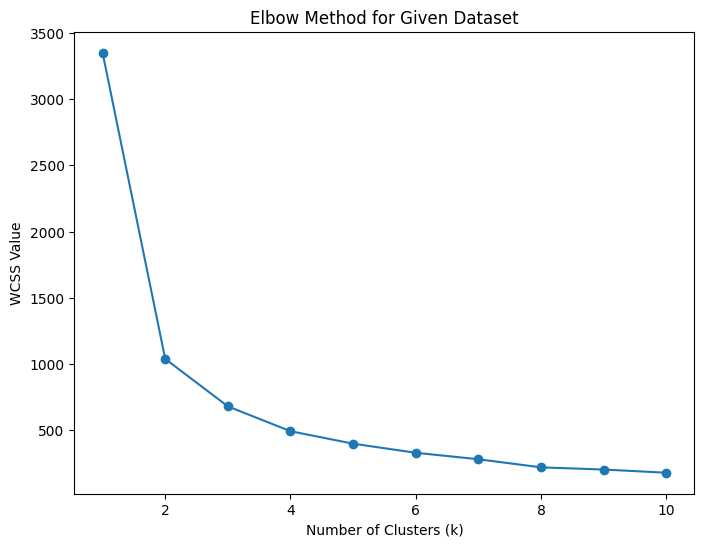

In [134]:
# Function for visualizing the Elbow Method
def elbow_method(df):
    # List that will contain the WCSS values
    elbow_plot = []

    # Calculates the final WCSS values of each clustering when k = 1 up to k = 10
    for i in range(1,11):
        new_centroids = df.sample(n=i, random_state=42)
        while True:
            wcss_val = calculate_wcss(df, new_centroids, i)
            if new_centroids.equals(calculate_centroids(kmeans_clustering(df, new_centroids, i))):
                elbow_plot.append([i, wcss_val])
                break
            else:
                new_centroids = calculate_centroids(kmeans_clustering(df, new_centroids, i))

    elbow_df = pd.DataFrame(elbow_plot, columns=["k","WCSS"])

    # Create a line chart
    plt.figure(figsize=(8, 6))
    plt.plot(elbow_df["k"],elbow_df["WCSS"], marker='o', linestyle='-')

    plt.title('Elbow Method for Given Dataset')
    plt.ylabel('WCSS Value')
    plt.xlabel('Number of Clusters (k)')
    plt.show()

elbow_method(df_sample)